**BUSINESS PROBLEM UNDERSTANDING** 

The goal is to use data analytics to understand sales trends, identify profitable products/customers, and optimize business decisions related to marketing, inventory, and revenue growth.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [51]:
df=pd.read_csv(r"C:\Users\upend\Downloads\Retail and wherehouse Sale.csv")
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0


In [52]:
df.shape


(30000, 9)

This dataset contains 30,000 sales records with 9 features (columns).

In [53]:
df.columns.tolist()

['YEAR',
 'MONTH',
 'SUPPLIER',
 'ITEM CODE',
 'ITEM DESCRIPTION',
 'ITEM TYPE',
 'RETAIL SALES',
 'RETAIL TRANSFERS',
 'WAREHOUSE SALES']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


This dataset contains 30,000 records and 9 columns representing sales information from various suppliers and item types across different months and years.
It includes details like item codes, descriptions, and sales performance across retail stores, transfers, and warehouses.

In [55]:
df["YEAR"].unique()

array([2020])

In [56]:
df["YEAR"].value_counts()

YEAR
2020    30000
Name: count, dtype: int64

In [57]:
df["MONTH"].unique()

array([1, 7, 3, 9])

In [58]:
df["MONTH"].value_counts()

MONTH
1    11987
7    11190
3     5730
9     1093
Name: count, dtype: int64

In [59]:
df["SUPPLIER"].unique()

array(['REPUBLIC NATIONAL DISTRIBUTING CO', 'PWSWN INC',
       'RELIABLE CHURCHILL LLLP', 'LANTERNA DISTRIBUTORS INC',
       'DIONYSOS IMPORTS INC', 'KYSELA PERE ET FILS LTD',
       'SANTA MARGHERITA USA INC', 'BROWN-FORMAN BEVERAGES WORLDWIDE',
       'JIM BEAM BRANDS CO', 'INTERNATIONAL CELLARS LLC',
       'HEAVEN HILL DISTILLERIES INC', 'BACCHUS IMPORTERS LTD',
       'MONSIEUR TOUTON SELECTION',
       'THE COUNTRY VINTNER, LLC DBA WINEBOW', 'ROYAL WINE CORP',
       'STE MICHELLE WINE ESTATES', 'Default', 'SAZERAC CO',
       'SALVETO IMPORTS LLC', 'HUB WINE CORPORATION',
       'ALLAGASH BREWING COMPANY', 'CAMPARI AMERICA LLC',
       'PERNOD RICARD USA LLC', 'PRESTIGE BEVERAGE GROUP OF MD LLC',
       'BACARDI USA INC', 'YOUNG WON TRADING INC',
       'TROEGS BREWING COMPANY', 'CASTLE BRANDS USA CORP', 'LEGENDS LTD',
       'WASHBURN WINE CO', 'CELICAR LLC DBA TWIN VALLEY DISTILLERS',
       'DOPS INC', 'JACKSON FAMILY ENTERPRISES INC',
       'BUCK DISTRIBUTING COMPANY INC'

In [60]:
df["SUPPLIER"].value_counts()

SUPPLIER
THE COUNTRY VINTNER, LLC DBA WINEBOW    2041
REPUBLIC NATIONAL DISTRIBUTING CO       1832
SOUTHERN GLAZERS WINE AND SPIRITS       1304
LEGENDS LTD                             1227
MONSIEUR TOUTON SELECTION               1131
                                        ... 
SNR HOLDINGS LLC                           1
SANGLIER SELECTIONS LLC                    1
RSL HOLDINGS INC                           1
MARQUEE SELECTIONS LLC                     1
SMITH-ANDERSON ENTERPRISES INC             1
Name: count, Length: 290, dtype: int64

In [61]:
df["ITEM CODE"].unique()

array(['100009', '100024', '1001', ..., '352162', '352268', '352320'],
      shape=(15668,), dtype=object)

In [62]:
df["ITEM CODE"].value_counts()

ITEM CODE
14206     4
140384    4
14044     4
140465    4
14052     4
         ..
351950    1
351942    1
351926    1
351914    1
351900    1
Name: count, Length: 15668, dtype: int64

In [63]:
df["ITEM DESCRIPTION"].unique()

array(['BOOTLEG RED - 750ML', 'MOMENT DE PLAISIR - 750ML',
       'S SMITH ORGANIC PEAR CIDER - 18.7OZ', ...,
       'ANXO NEVERTHELESS WE PERSISTED 1/6 KEG',
       "E' ARTE PRIMITIVO - 750ML",
       'CINCO SENTIDOS PAPALOMETL MEZCAL - 750ML'],
      shape=(15732,), dtype=object)

In [64]:
df["ITEM DESCRIPTION"].value_counts()

ITEM DESCRIPTION
TENTH WARD DIST CO CARAWAY RYE - 750ML             5
LINGANORE BLACK RAVEN - 750ML                      5
LANGE TWINS ZIN - 750ML                            4
CHAKANA EST RED BLEND - 750ML                      4
CHOREY LES BEAUME DUBOIS - 750ML                   4
                                                  ..
FLOR DE CANA CENTENARIO 25YR - 750ML               1
LOS MORROS CARMENERE - 750ML                       1
EIKO FUJI HONKARA DRY MOUNTAIN - 720ML             1
FORTALEZA STILL STRENGHT BLANCO TEQUILA - 750ML    1
LE PETIT PONT ROSE- 750ML                          1
Name: count, Length: 15732, dtype: int64

In [65]:
df["ITEM TYPE"].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL'], dtype=object)

In [66]:
df["ITEM TYPE"].value_counts()

ITEM TYPE
WINE            18680
LIQUOR           5995
BEER             4217
KEGS              808
NON-ALCOHOL       216
STR_SUPPLIES       63
DUNNAGE            13
REF                 8
Name: count, dtype: int64

In [67]:
df["RETAIL SALES"].unique()

array([  0.  ,   0.82,   2.76, ..., 104.56,  22.65, 329.04], shape=(3658,))

In [68]:
df["RETAIL SALES"].value_counts()

RETAIL SALES
0.00     13689
0.08       819
0.17       635
0.16       480
0.24       310
         ...  
39.98        1
26.03        1
91.58        1
81.70        1
23.13        1
Name: count, Length: 3657, dtype: int64

In [69]:
df["RETAIL TRANSFERS"].unique()

array([ 0.0000e+00,  1.0000e+00,  4.0000e+00,  1.1840e+01,  1.1000e+01,
        3.0000e+00,  3.6000e+01,  2.0000e+00,  1.5000e+01,  5.0000e+00,
        8.0000e+00,  4.5000e+01,  1.9000e+01,  6.3000e+01,  2.2000e+01,
        4.6000e+01,  1.7670e+01,  3.4000e+01,  3.8000e+01,  2.9660e+01,
        4.7000e+01,  9.0000e+00,  6.0000e+00,  8.7500e+00,  2.1000e+01,
        1.8000e+01,  1.2000e+01,  1.3000e+01,  3.0000e+01,  6.6670e+01,
        3.9200e+00,  7.0000e+00,  1.0400e+02,  7.0000e+01,  2.5000e+01,
        3.3000e+01,  6.4000e+01,  6.7500e+00,  2.6000e+01,  2.9000e+01,
        1.4300e+02,  5.2000e+01,  2.3160e+01,  1.0459e+02,  1.2083e+02,
        1.4700e+02,  1.2080e+01,  1.0000e+01,  3.5000e+01,  3.2000e+01,
        3.7000e+01,  3.9000e+01,  4.4000e+01,  4.1000e+01,  1.9200e+00,
        1.7000e+01,  9.2000e-01,  1.6000e+01,  2.0000e+01,  1.4000e+01,
        1.8100e+02,  2.8000e+01,  1.0100e+02,  6.6000e+01,  4.2000e+01,
        1.7590e+01,  3.6700e+00,  1.2670e+01,  8.3000e-01,  1.99

In [70]:
df["RETAIL TRANSFERS"].value_counts()

RETAIL TRANSFERS
0.00      19137
1.00       2094
2.00       1036
3.00        696
4.00        558
          ...  
153.00        1
309.00        1
244.67        1
4.42          1
327.67        1
Name: count, Length: 542, dtype: int64

In [71]:
df["WAREHOUSE SALES"].unique()

array([2.000e+00, 4.000e+00, 1.000e+00, ..., 3.670e+00, 2.180e+03,
       2.031e+03], shape=(1032,))

In [72]:
df["WAREHOUSE SALES"].value_counts()

WAREHOUSE SALES
0.00      7928
1.00      7058
2.00      3138
3.00      1960
4.00      1307
          ... 
231.75       1
51.79        1
671.00       1
124.93       1
55.75        1
Name: count, Length: 1032, dtype: int64

In [73]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


The data covers a time period from 2017 to 2020, with monthly records. "Retail_sales", "Retail_transfers", and "Warehouse_sales" exhibit high variability, as indicated by their large standard deviations. There are some negative values in "Retail_sales", "Retail_transfers", and "Warehouse_sales", which may indicate returns, corrections, or other adjustments. The median values for "Retail_sales", "Retail_transfers", and "Warehouse_sales" are close to zero, suggesting that many records have low or no - ---sales/transfers for those categories.

In [74]:
df.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

The dataset is mostly complete, with very few missing values:
SUPPLIER: 33 missing entries
RETAIL SALES: 1 missing entry
All other columns have no missing data, indicating overall good data quality with minimal cleaning required.

**DATA CLEANING**

In [75]:
df_clean = df.dropna()

In [76]:
df = df.rename(columns={
    'YEAR':'Year',
    'MONTH':'Month',
    'SUPPLIER':'Supplier',
    'ITEM CODE':'Item_Code',
    'ITEM DESCRIPTION':'Item_Description',
    'ITEM TYPE':'Item_Type',
    'RETAIL SALES':'Retail_Sales',
    'RETAIL TRANSFERS':'Retail_Transfers',
    'WAREHOUSE SALES':'Warehouse_Sales'
})


In [77]:
df

,Year,Month,Supplier,Item_Code,Item_Description,Item_Type,Retail_Sales,Retail_Transfers,Warehouse_Sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0


In [78]:

df['Supplier'].fillna('Unknown', inplace=True)


df['Retail_Sales'].fillna(df['Retail_Sales'].median(), inplace=True)


In [79]:
print(df.isnull().sum())


Year                0
Month               0
Supplier            0
Item_Code           0
Item_Description    0
Item_Type           0
Retail_Sales        0
Retail_Transfers    0
Warehouse_Sales     0
dtype: int64


In [80]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_Code', 'Item_Description',
       'Item_Type', 'Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales'],
      dtype='object')

**Data Visualization**

Text(0.5, 0, 'Total count ')

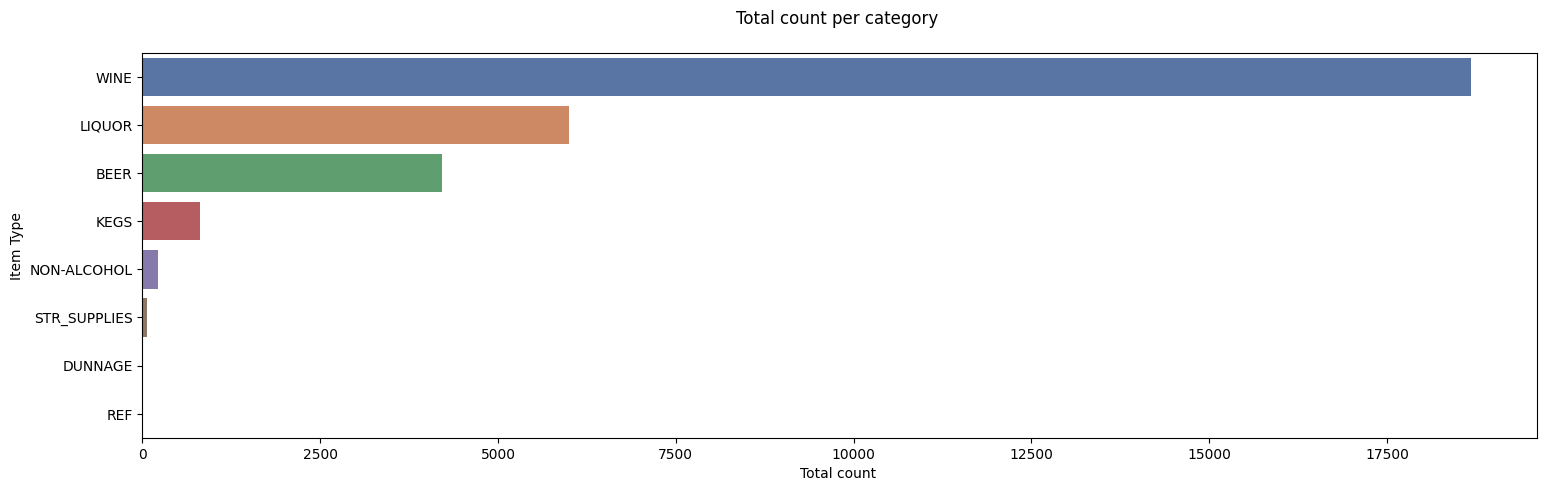

In [82]:

ItemCount = df["Item_Type"].value_counts()

plt.figure(figsize=(18,5))
sns.countplot(y= df['Item_Type'], order= df['Item_Type'].value_counts().index, palette='deep')
plt.title('Total count per category \n')
plt.ylabel('Item Type')
plt.xlabel('Total count ')

The bar chart shows the total number of items available in each Item Type category.
It helps visualize which product categories dominate the sales dataset.
WINE has the highest count, indicating it’s the most frequently sold or stocked item.
LIQUOR and BEER follow as the next most common categories.
Categories like KEGS, NON-ALCOHOL, STR_SUPPLIES, DUNNAGE, and REF have much lower counts

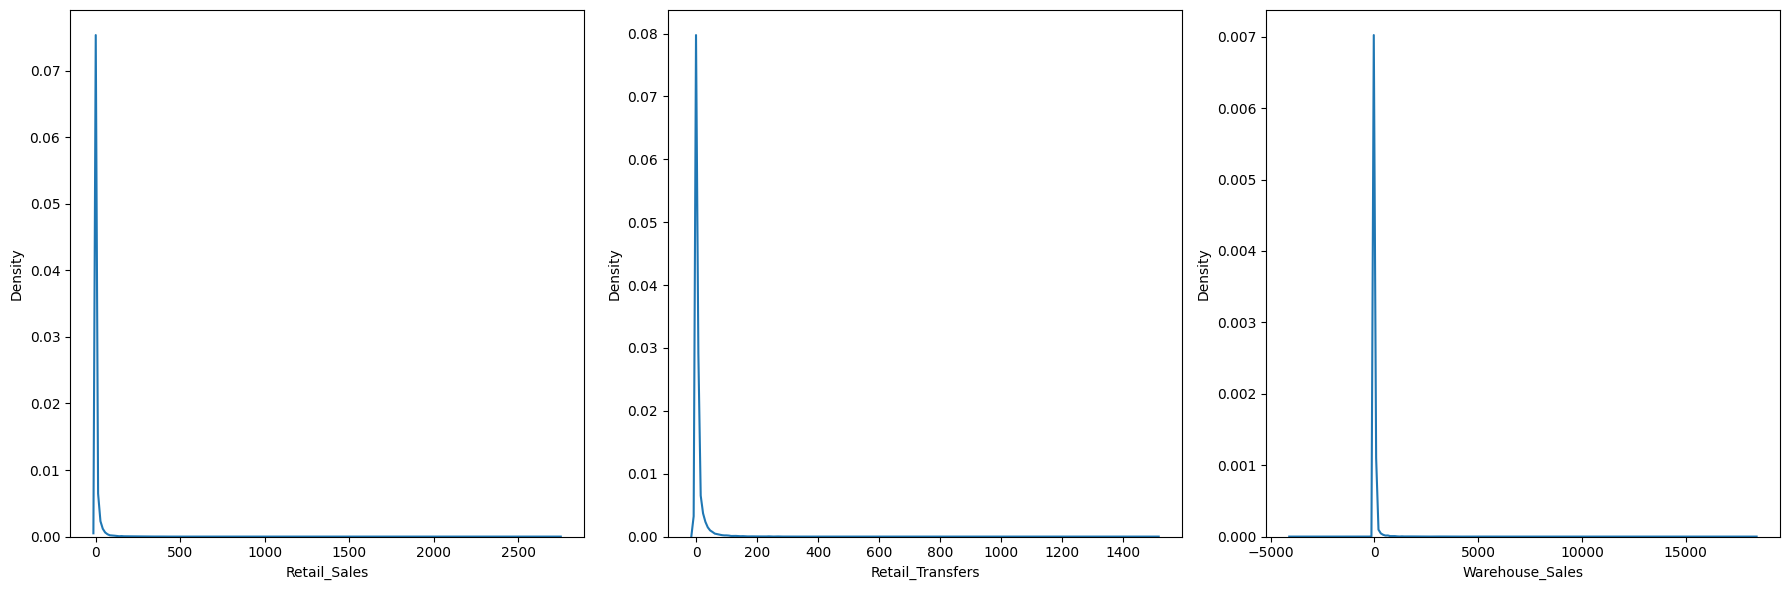

In [83]:
plt.figure(figsize=(18, 6))  # Adjust figure size for more subplots

# Select numerical columns excluding 'Year' and 'Month'
numerical_cols = [col for col in df.select_dtypes(exclude='object').columns
                  if col not in ['Year', 'Month']]
num_cols = len(numerical_cols)

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(1, num_cols, i + 1)  # Dynamically adjust subplot layout
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

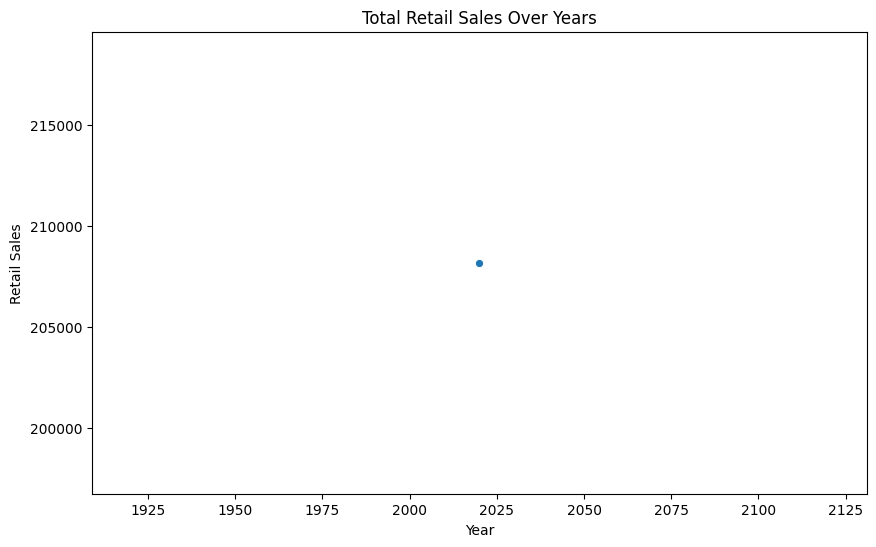

In [84]:
#Sales trend over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('Year')['Retail_Sales'].sum().reset_index(),
             x='Year', y='Retail_Sales', marker='o')
plt.title("Total Retail Sales Over Years")
plt.ylabel("Retail Sales")
plt.xlabel("Year")
plt.show()


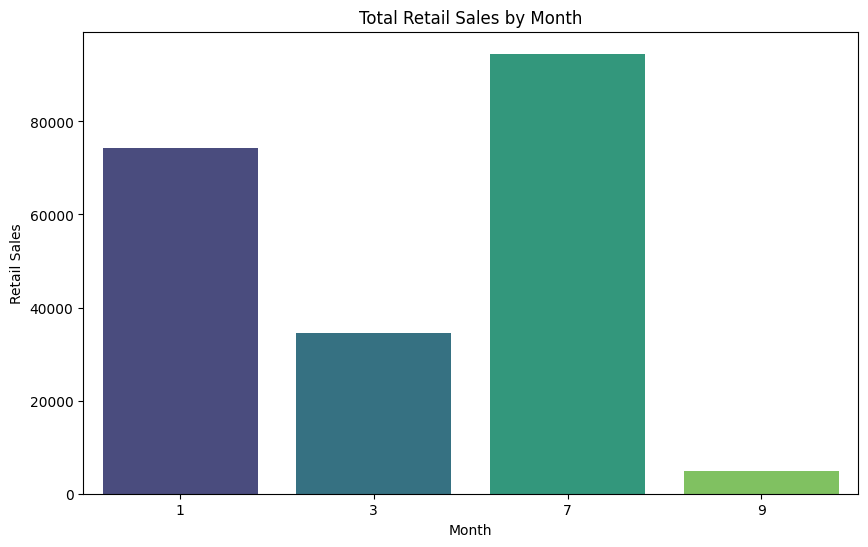

In [85]:
#Monthly sales pattern(seasonality)
monthly_sales = df.groupby('Month')['Retail_Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_sales, x='Month', y='Retail_Sales', palette='viridis')
plt.title("Total Retail Sales by Month")
plt.ylabel("Retail Sales")
plt.xlabel("Month")
plt.show()


The bar chart represents the total retail sales distributed across different months of the year 2020.
Month 7 (July) shows the highest retail sales, indicating a strong peak in customer purchases during that period.
Month 1 (January) also recorded high sales, suggesting good performance at the start of the year.
Month 3 (March) had moderate sales, while
Month 9 (September) recorded the lowest sales, showing a significant drop.

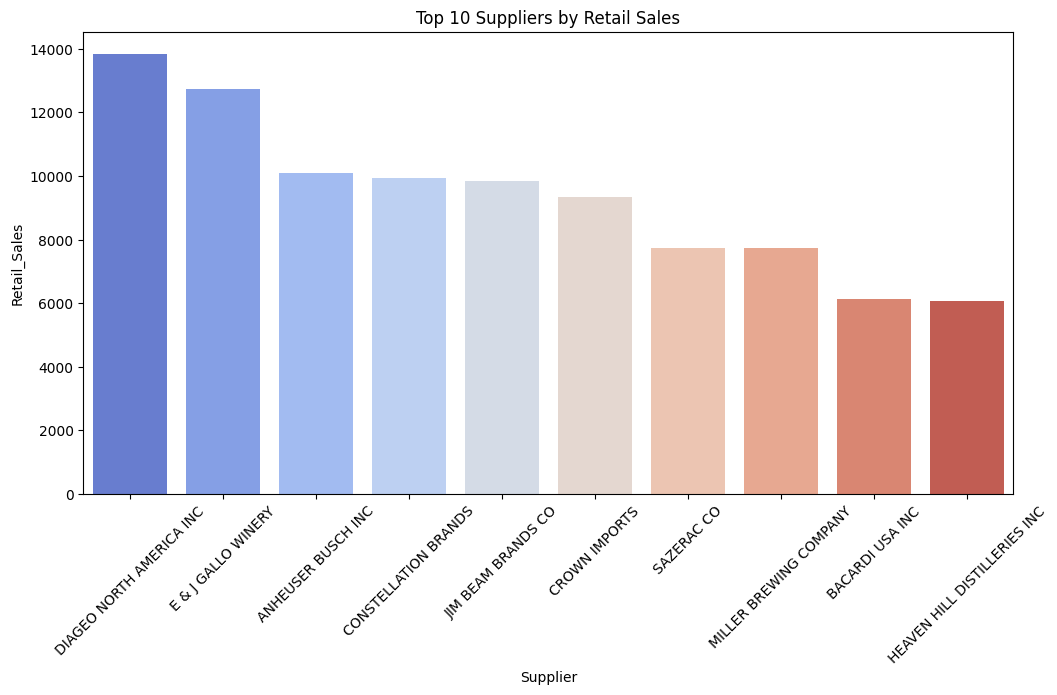

In [86]:
#Top 10 suppliers by sales
top_suppliers = df.groupby('Supplier')['Retail_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_suppliers, x='Supplier', y='Retail_Sales', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Suppliers by Retail Sales")
plt.show()


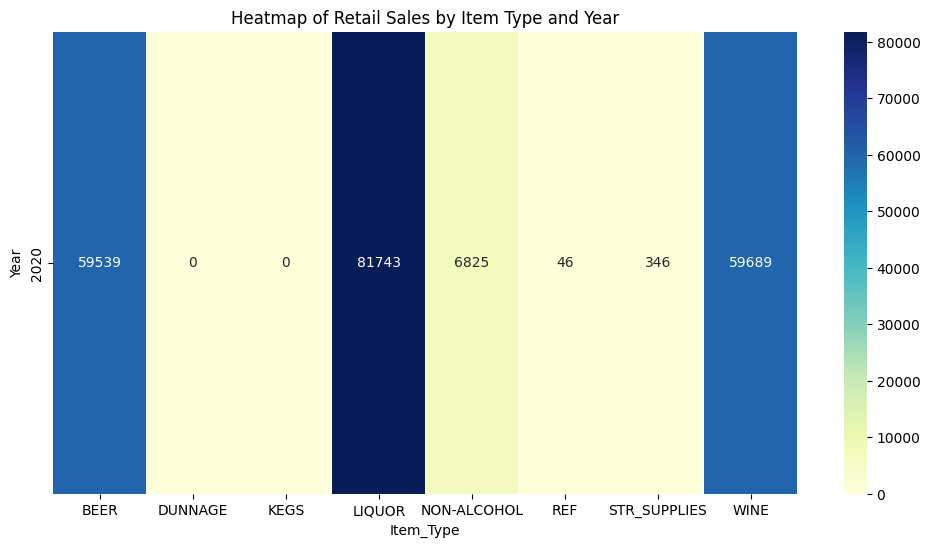

In [95]:
#Heatmap of retail vs Warehouse sales by year
pivot = df.pivot_table(values='Retail_Sales', index='Year', columns='Item_Type', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Retail Sales by Item Type and Year")
plt.show()


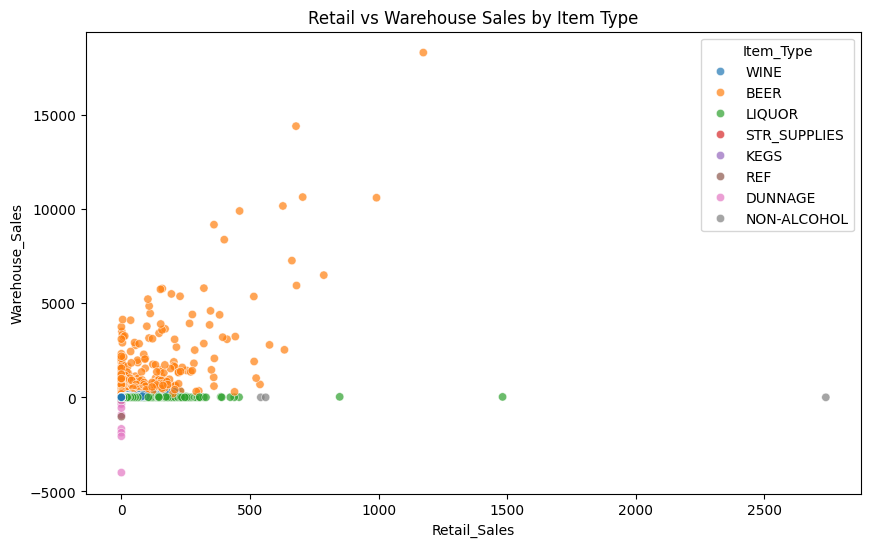

In [96]:
#Scatter plot Retail vs Warehouse sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Retail_Sales', y='Warehouse_Sales', hue='Item_Type', alpha=0.7)
plt.title("Retail vs Warehouse Sales by Item Type")
plt.show()


**Feature Engineering**

In [100]:
import calendar

In [101]:
df['Total_Sales'] = df['Retail_Sales'] + df['Warehouse_Sales'] + df['Retail_Transfers']
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x])


**Correlation Analysis**

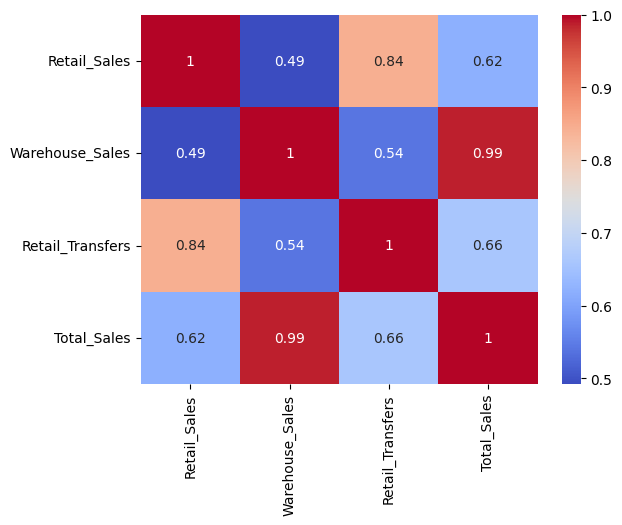

In [102]:
corr = df[['Retail_Sales','Warehouse_Sales','Retail_Transfers','Total_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Warehouse Sales and Total Sales have a very strong positive correlation (0.99) — meaning total sales are highly influenced by warehouse sales.
Retail Sales and Retail Transfers also show a strong positive correlation (0.84), indicating that higher retail sales often occur alongside more retail transfers.
Retail Sales and Warehouse Sales have a moderate correlation (0.49), suggesting some level of relationship but not a strong dependency.
All variables are positively correlated, showing that as one type of sale increases, others tend to increase too.

This project focuses on analyzing a sales dataset containing 30,000 records and 9 features related to retail, warehouse, and transfer sales across different items, suppliers, and months of 2020. The goal is to extract meaningful business insights and understand sales performance trends.